importing the library and loading and reading csv


In [39]:
!pip install category_encoders

In [40]:
from category_encoders import OrdinalEncoder

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [42]:
df=pd.read_csv('train.csv')

Data Wrangling

In [43]:
df1=df

In [44]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [45]:
print(f"The shape of the dataframe is: {df1.shape}")

The shape of the dataframe is: (614, 13)


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [47]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [48]:
df1.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [49]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
df1.duplicated().sum()

0

In [51]:
df1.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


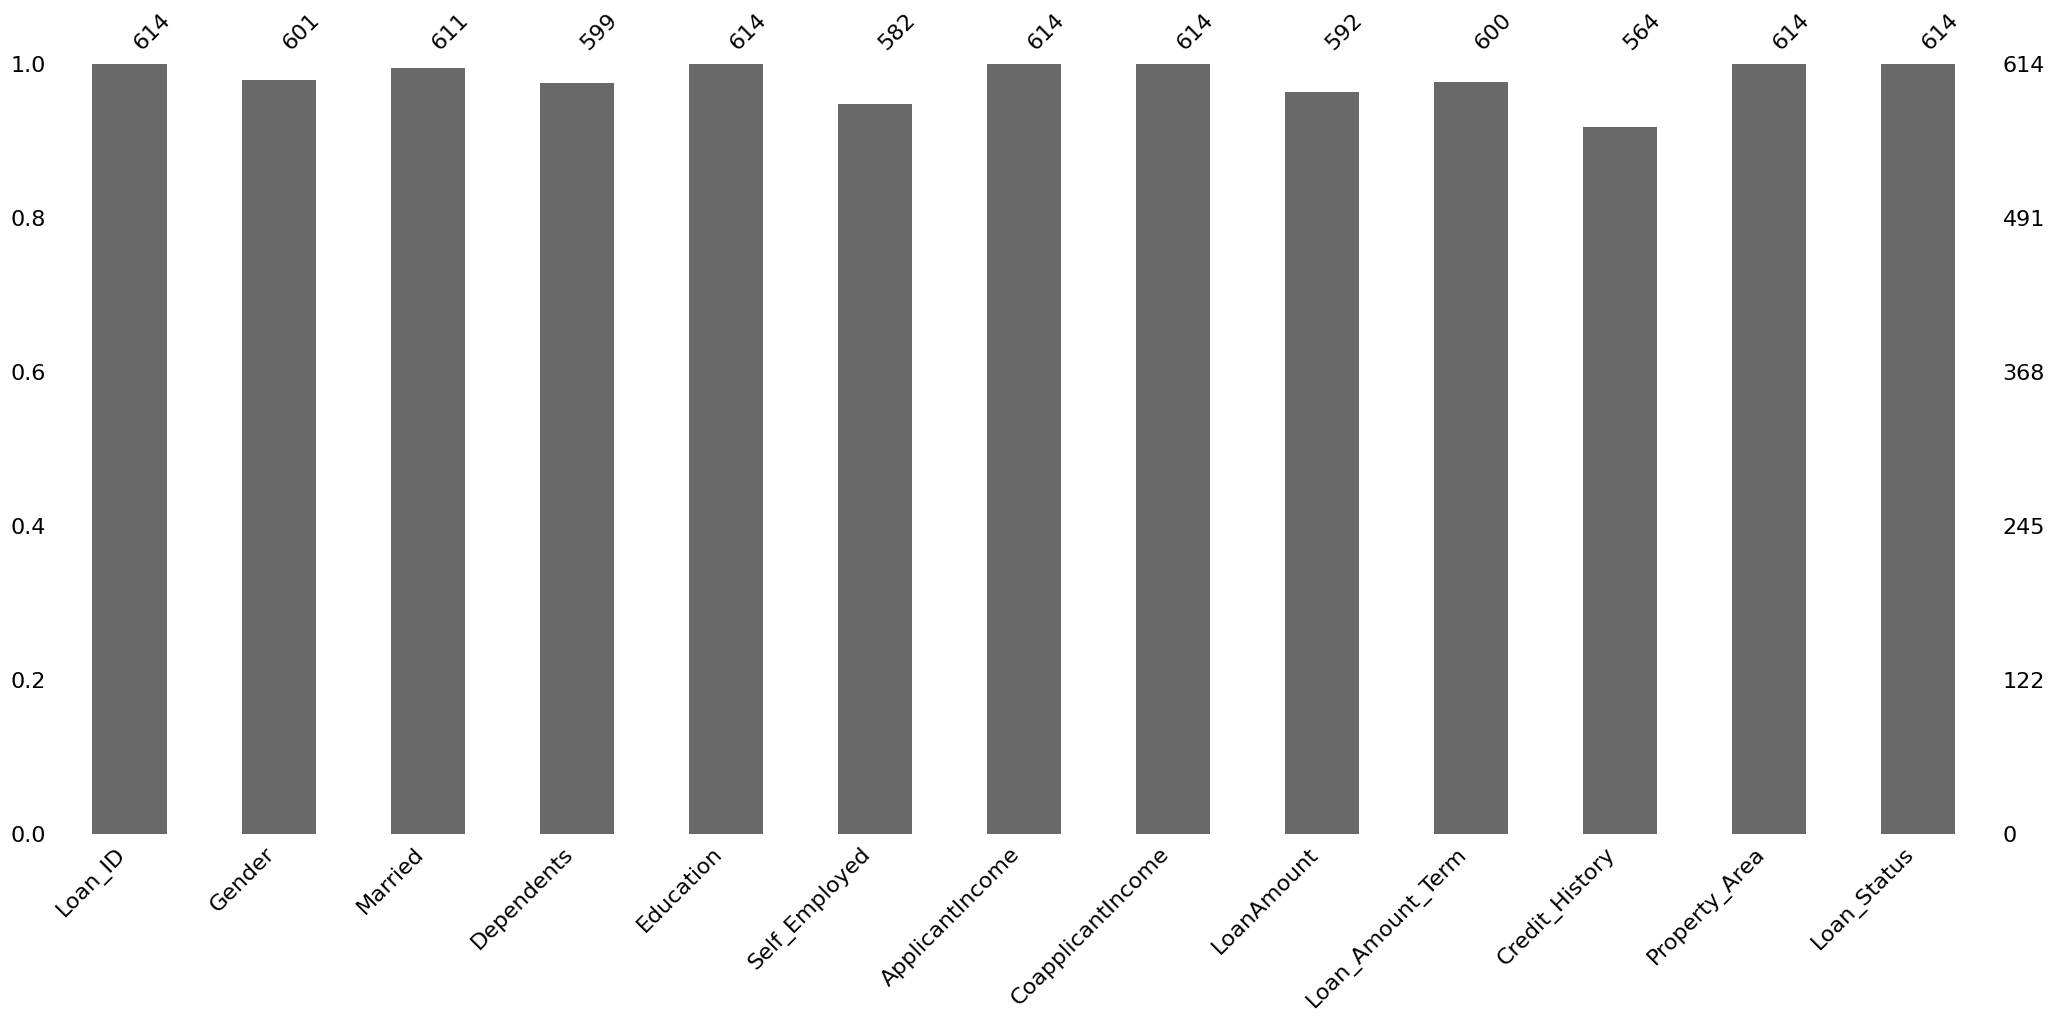

In [52]:
null_counts = df1.isnull().sum()
msno.bar(df1)
print(null_counts)

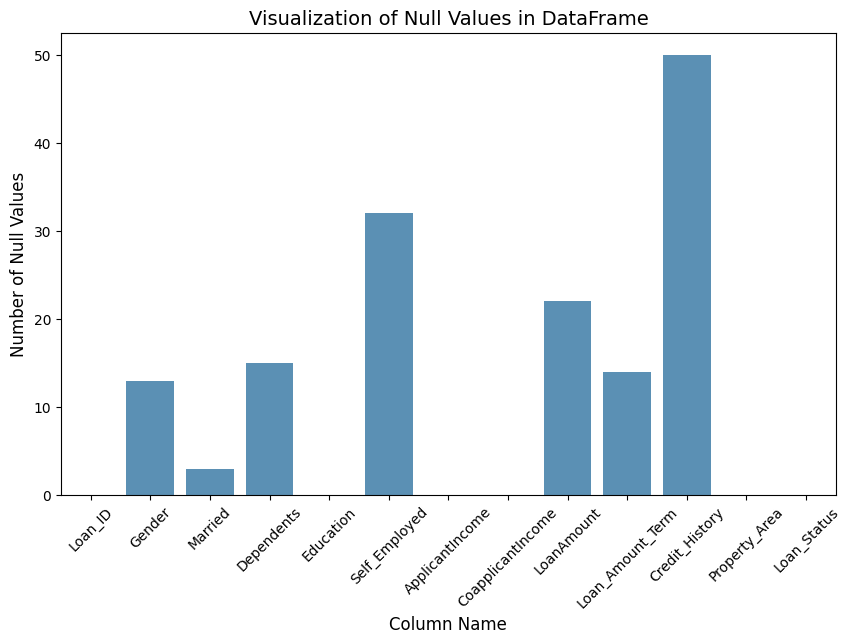

In [53]:
null_values = df1.isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=null_values.index, y=null_values.values, alpha=0.8)

plt.xlabel("Column Name", fontsize=12)
plt.ylabel("Number of Null Values", fontsize=12)
plt.title("Visualization of Null Values in DataFrame", fontsize=14)

plt.xticks(rotation=45)
plt.show()

Data Cleaning

In [54]:
df1.drop(columns="Loan_ID",axis=1,inplace=True)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<ipython-input-55-22969b543a26>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df1['Loan_Status'], palette = {'Y': 'blue', 'N': 'orange'})


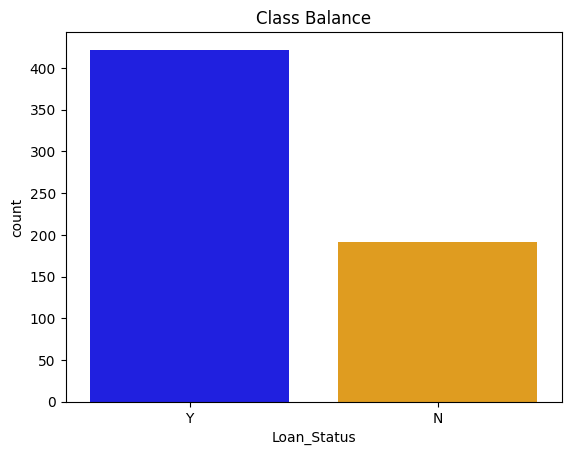

In [55]:
sns.countplot(x = df1['Loan_Status'], palette = {'Y': 'blue', 'N': 'orange'})
plt.title('Class Balance')
plt.show()

In [56]:
df1['Dependents'] = df1['Dependents'].replace({'3+': 4})
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [57]:
filtered_df = df1[df1['Dependents'] == 4]
print(filtered_df)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
7      Male     Yes          4      Graduate            No             3036   
34     Male      No          4      Graduate            No            12500   
61     Male     Yes          4      Graduate            No             3029   
68     Male     Yes          4  Not Graduate           Yes             7100   
73     Male     Yes          4  Not Graduate            No             4755   
74     Male     Yes          4      Graduate           Yes             5266   
78     Male     Yes          4      Graduate            No             3167   
79     Male     Yes          4  Not Graduate           Yes             3333   
109    Male     Yes          4  Not Graduate            No             2071   
126     NaN     Yes          4      Graduate            No            23803   
135    Male     Yes          4      Graduate            No             4000   
155    Male     Yes          4      Graduate        

In [58]:
rows_count=len(filtered_df)
print(f"Total number of rows in filtere_df is: {rows_count}")

Total number of rows in filtere_df is: 51


In [59]:
df1["Dependents"].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

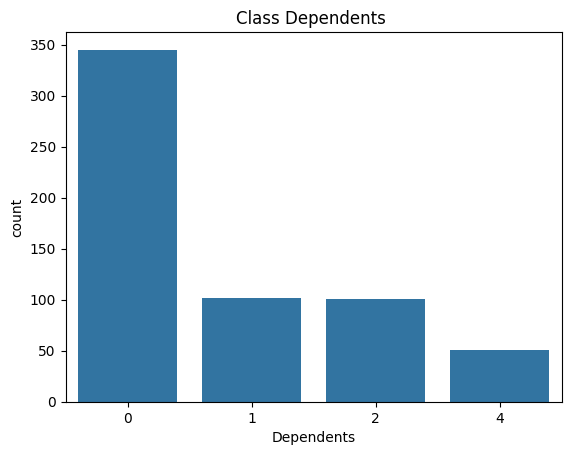

In [60]:
sns.countplot(x=df1["Dependents"])
plt.title('Class Dependents ');

Text(0.5, 1.0, 'Dependents and Load Status')

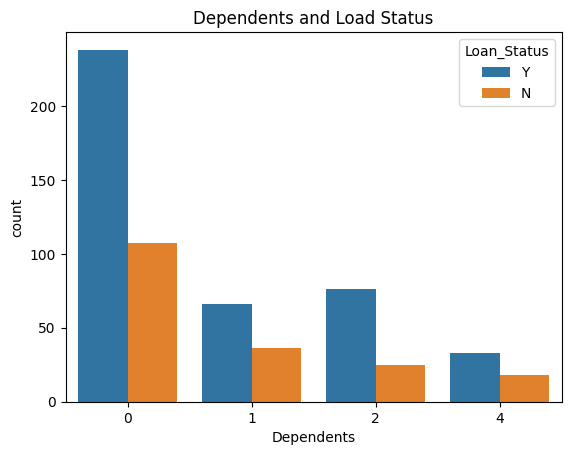

In [61]:
sns.countplot(x=df1["Dependents"], hue=df1["Loan_Status"])
plt.title("Dependents and Load Status")

Text(0.5, 1.0, 'Education and Loan Status')

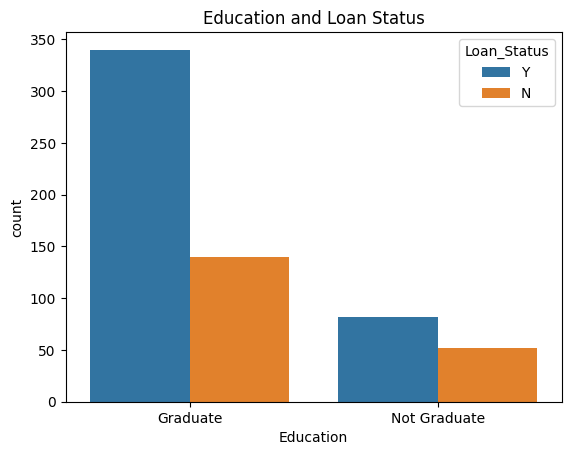

In [62]:
sns.countplot(x=df1["Education"], hue= df1["Loan_Status"])
plt.title("Education and Loan Status")

In [63]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Text(0.5, 1.0, 'Self Employed and Loan Status')

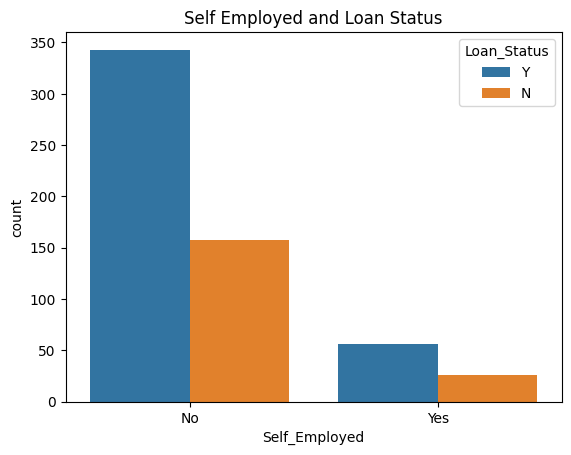

In [64]:
sns.countplot(x=df1["Self_Employed"], hue=df1["Loan_Status"])
plt.title("Self Employed and Loan Status")

Text(0.5, 1.0, 'Marital and Loan Status')

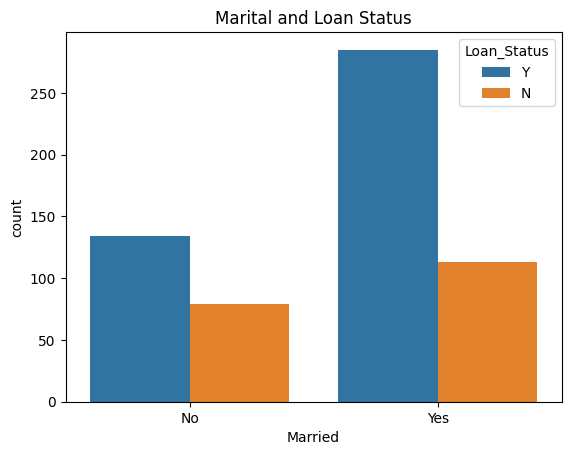

In [65]:
sns.countplot(x=df1["Married"], hue=df1["Loan_Status"])
plt.title("Marital and Loan Status")

Splitting of data

In [66]:
target= 'Loan_Status'
x=df1.drop(columns=[target])
y=df1[target]
print(f"X Shape {x.shape}")
print(f"Y shape {y.shape}")

X Shape (614, 11)
Y shape (614,)


In [67]:
x_test, x_train, y_test, y_train= train_test_split(x,y,test_size=0.2, random_state=42)

In [68]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_train.shape)
print("y_test shape:",y_train.shape)

x_train shape: (123, 11)
y_train shape: (123,)
x_test shape: (123, 11)
y_test shape: (123,)


Baseline model

In [69]:
acc_baseline=df1['Loan_Status'].value_counts(normalize=True).max()
print(f"Baseline Accuracy is {acc_baseline}")

Baseline Accuracy is 0.6872964169381107


In [70]:
def train(model,model_name):
    model.fit(x_train,y_train)
    print(f'training accuracy of {model_name} is: {model.score(x_test,y_test)}')
    print(f'testing accuracy of {model_name} is: {model.score(x_test,y_test)}')

def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(svm_model,x_test,y_test)

def class_report(model):
    print(classification_report(y_test, model.predict(x_test)))

SVM

In [71]:
#Build model

svm_model= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    MinMaxScaler(),
    SVC(kernel='linear')
)

In [72]:
train(svm_model, "SVC")

training accuracy of SVC is: 0.814663951120163
testing accuracy of SVC is: 0.814663951120163


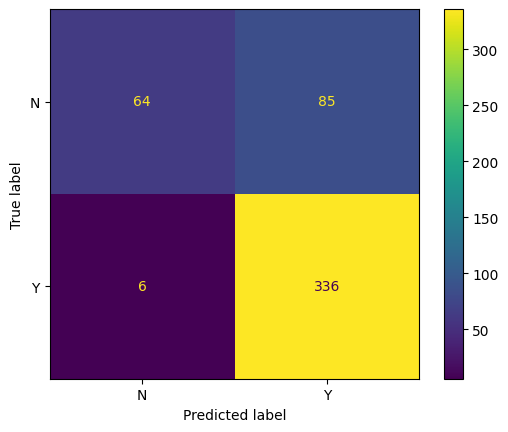

In [73]:
conf_matrix(svm_model)

In [74]:
class_report(svm_model)

              precision    recall  f1-score   support

           N       0.91      0.43      0.58       149
           Y       0.80      0.98      0.88       342

    accuracy                           0.81       491
   macro avg       0.86      0.71      0.73       491
weighted avg       0.83      0.81      0.79       491



Logistic Regression

In [75]:
#Build Model
Logistic_model= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    MinMaxScaler(),
    LogisticRegression()
)

In [76]:
train(Logistic_model, "LogisticRegression")

training accuracy of LogisticRegression is: 0.8207739307535642
testing accuracy of LogisticRegression is: 0.8207739307535642


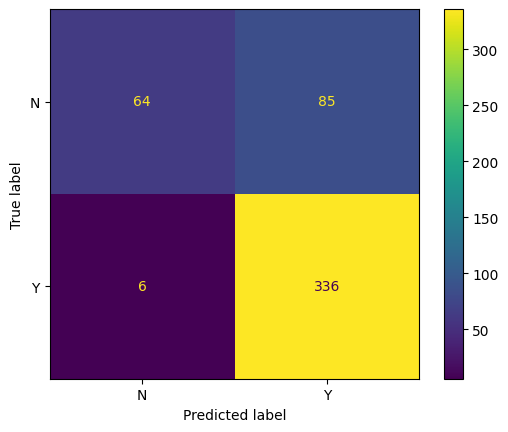

In [77]:
conf_matrix(Logistic_model)

In [78]:
class_report(Logistic_model)

              precision    recall  f1-score   support

           N       0.92      0.45      0.60       149
           Y       0.80      0.98      0.88       342

    accuracy                           0.82       491
   macro avg       0.86      0.72      0.74       491
weighted avg       0.84      0.82      0.80       491



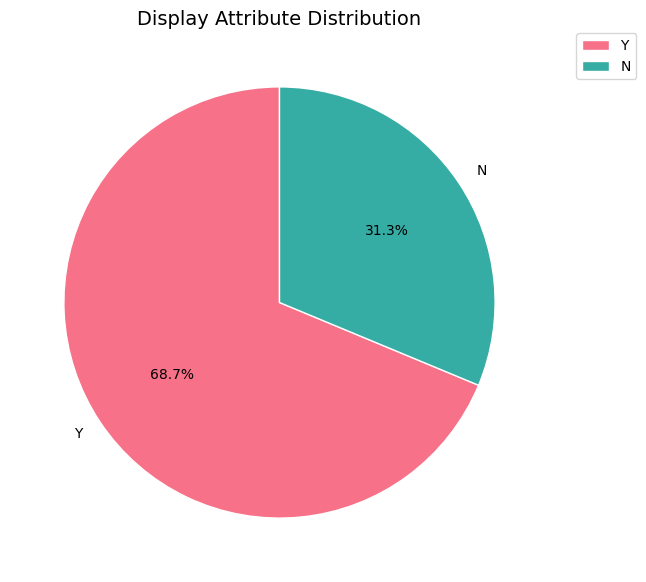

In [79]:
labels = df1['Loan_Status'].value_counts().index.to_list()
colors = sns.color_palette('husl', len(labels))

plt.figure(figsize=(10, 7))
plt.pie(df1['Loan_Status'].value_counts(), labels=labels, autopct='%.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 1})

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.title('Display Attribute Distribution', fontsize=14)
plt.show()

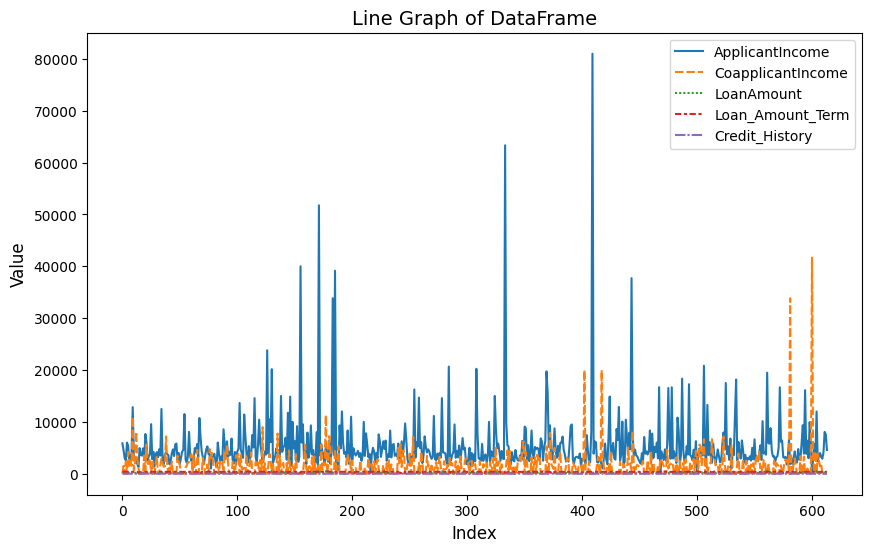

In [80]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.title("Line Graph of DataFrame", fontsize=14)
plt.show()